# **1. Importing Data & Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/aerofit_treadmill.csv")

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# **2. Checking the Dataset**

In [ ]:
df.shape

(180, 9)

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    180
dtype: int64

#### **Observations:**

> **There** are **no null** values and **no duplicated** entries.



# **3. Initial Analysis**

In [ ]:
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


####**Insights:**

> 1.   **Product:** KP281 is top selling product.
2.   **Gender:** Majority of the buyers are Male.
3.   **Marital Status:** Majority of the buyers are Partnered.




In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Insights:**
1.   **Age:** Age of customers lies in the range of 18 to 50 years with a average age of 29 years

2.   **Educaton:** The years of education span from 12 to 21 years with a average of 16 years.

3.   **Usage:** Customer plan to use the treadmill 3 to 7 times a week.

4.   **Fitness:** On a scale of 1 to 5 the average fitness rating of customers is 3.

5.   **Income:** Average income of the customers is $53720 per annum.

6.   **Miles:** Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.

### **Checking Unique values in all columns**



In [ ]:
for i in df.columns:
  print("Unique values in:", i)
  print(df[i].unique())
  print("-" * 70)

Unique values in: Product
['KP281' 'KP481' 'KP781']
----------------------------------------------------------------------
Unique values in: Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
----------------------------------------------------------------------
Unique values in: Gender
['Male' 'Female']
----------------------------------------------------------------------
Unique values in: Education
[14 15 12 13 16 18 20 21]
----------------------------------------------------------------------
Unique values in: MaritalStatus
['Single' 'Partnered']
----------------------------------------------------------------------
Unique values in: Usage
[3 2 4 5 6 7]
----------------------------------------------------------------------
Unique values in: Fitness
[4 3 2 1 5]
----------------------------------------------------------------------
Unique values in: Income
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  3979

# **4. Outlier Detection**

### **Checking for outliers for every continuous variable**

> 1. Age
2. Income
3. Miles
4. Education




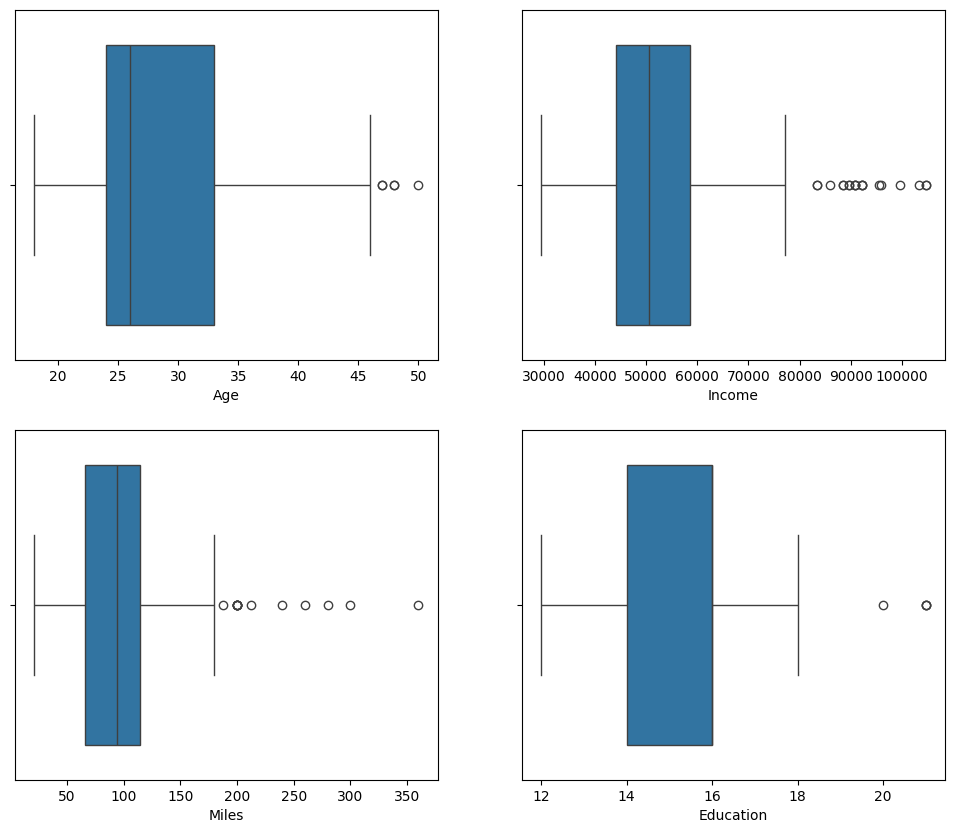

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.boxplot(data = df, x = "Age", ax=axis[0,0])

sns.boxplot(data = df, x = "Income", ax=axis[0,1])

sns.boxplot(data = df, x = "Miles", ax=axis[1,0])

sns.boxplot(data = df, x = "Education", ax=axis[1,1])

plt.show()

In [ ]:
columns_to_clip = ['Age', 'Income', 'Miles']
df2 = df.copy()

for column in columns_to_clip:
    lower_percentile = np.percentile(df2[column], 5)
    upper_percentile = np.percentile(df2[column], 95)
    df2[column] = np.clip(df2[column], lower_percentile, upper_percentile)

df2 # Clipped dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.00,Male,14,Single,3,4,34053.15,112
1,KP281,20.00,Male,15,Single,2,3,34053.15,75
2,KP281,20.00,Female,14,Partnered,4,3,34053.15,66
3,KP281,20.00,Male,12,Single,3,3,34053.15,85
4,KP281,20.00,Male,13,Partnered,4,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40.00,Male,21,Single,6,5,83416.00,200
176,KP781,42.00,Male,18,Single,5,4,89641.00,200
177,KP781,43.05,Male,16,Single,5,5,90886.00,160
178,KP781,43.05,Male,18,Partnered,4,5,90948.25,120


# **5. Understanding Relationship between data**



**Relationship between the Categorical variables and Products**

> 1.   Product vs Gender
2.   Product vs Marital Status



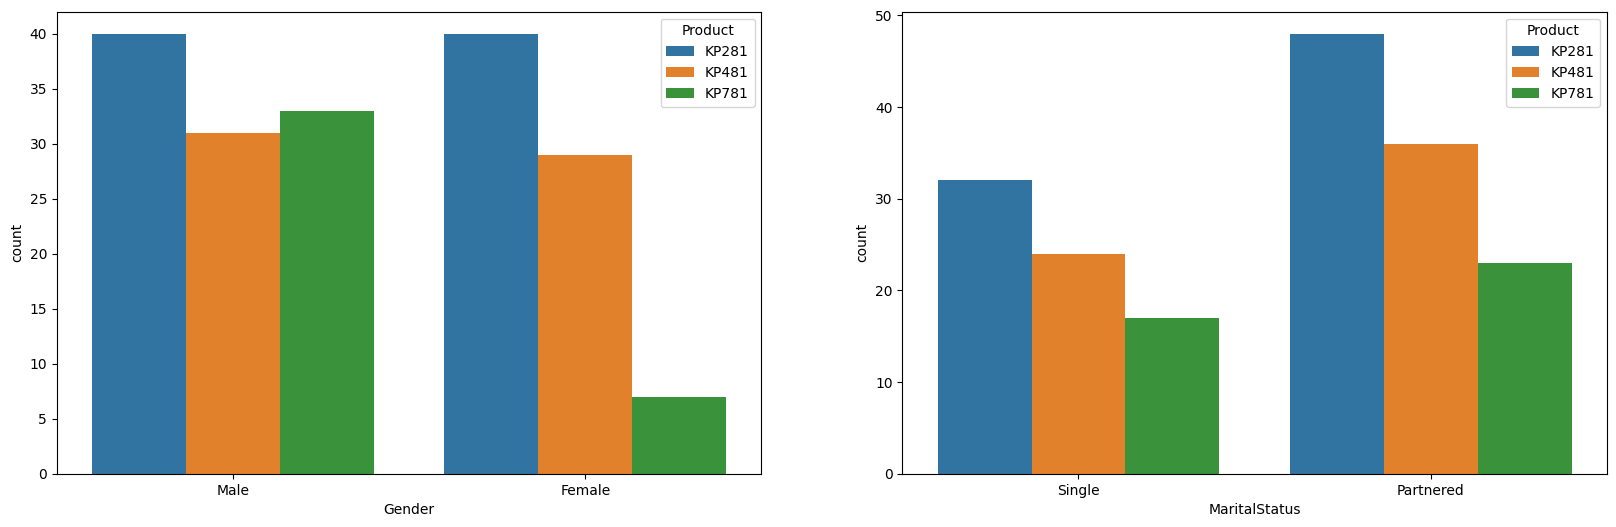

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.countplot(data = df, x = "Gender", hue = 'Product', ax=axis[0])

sns.countplot(data = df, x = "MaritalStatus", hue = 'Product', ax=axis[1])

plt.show()

In [ ]:
df1 = df[["Gender", "MaritalStatus"]].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df) * 100

value
variable      value               
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556

**Relationship between the Continous variables and Products**

> 1.   Age
2.   Income
3. Miles

# **6. Correlation HeatMap**

<ipython-input-50-af2880283ee6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = df2.corr()


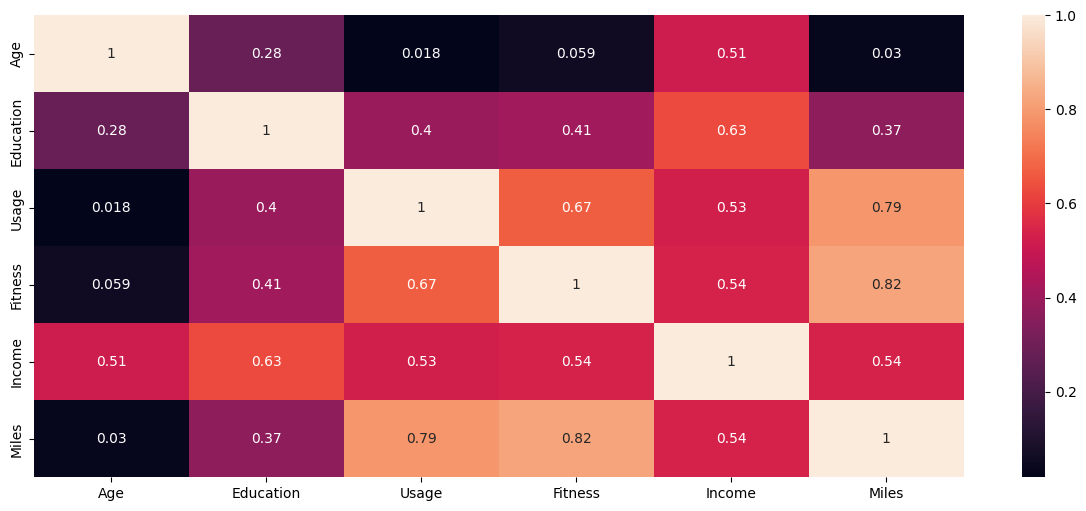

In [ ]:
a = df2.corr()
plt.figure(figsize=(15,6))
sns.heatmap(data = a, annot = True)

plt.show()

<Axes: xlabel='Fitness', ylabel='Usage'>

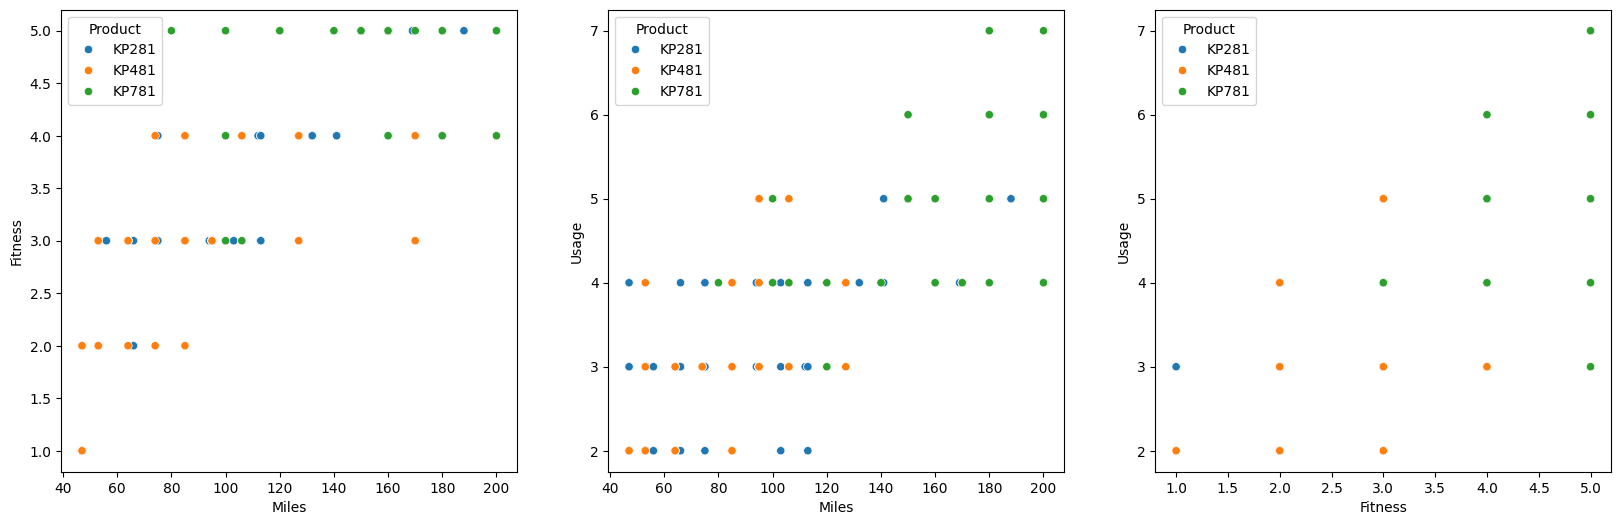

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.scatterplot( y = df2['Fitness'], x = df2['Miles'], hue = df2['Product'], ax = axis[0])

sns.scatterplot( y = df2['Usage'], x = df2['Miles'], hue = df2['Product'], ax = axis[1])

sns.scatterplot( y = df2['Usage'], x = df2['Fitness'], hue = df2['Product'], ax = axis[2])

# **7. Representing the Probability**

### **Finding the marginal probability**

> Percentage of customers purchased KP281, KP481, or KP781



In [ ]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
df_sales = df['Product'].value_counts().to_frame().reset_index()

df_sales['Sales'] = df_sales['Product'] * [1500, 1750, 2500]

df_sales['Percentage_sale'] = round(((df_sales['Sales'] / df_sales['Sales'].sum()) * 100), 2)

df_sales

,index,Product,Sales,Percentage_sale
0,KP281,80,120000,36.92
1,KP481,60,105000,32.31
2,KP781,40,100000,30.77


**Insight**

> 1. 44% of treadmills sold were KP281 contributing to 36.92% of the total sales.
2. 33% of treadmills sold were KP481 contributing to 32.31% of the total sales.
3. 22% of treadmills sold were KP781 contributing to 30.77% of the total sales



### **Probability based on each column**

### **Product & Gender**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Gender'], margins = True, normalize = True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


**Insight**

1. Probability of treadmill being purchased by a Female is **42%**

  * The **conditional probability** of purchasing the treadmill model given that the customer is female is:
    * For KP281 is 22%
    * For KP481 is 16%
    * For KP781 is 4%

2. Probability of treadmill being purchased by a Male is **58%**

  * The **conditional probability** of purchasing the treadmill model given that the customer is male is:
    * For KP281 is 22%
    * For KP481 is 17%
    * For KP781 is 18%



### **Product & Marital Status**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], margins = True, normalize = True).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


**Insight**

1. Probability of treadmill being purchased by a **Married customer is 59%**

  * The **conditional probability** of purchasing the treadmill model given that the customer is Married is:
    * For KP281 is 27%
    * For KP481 is 20%
    * For KP781 is 13%

2. Probability of treadmill being purchased by a **Unmarried customer is 41%**

  * The **conditional probability** of purchasing the treadmill model given that the customer is unmarried is:
    * For KP281 is 18%
    * For KP481 is 13%
    * For KP781 is 9%

### **Product & Fitness Level**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Fitness'], margins = True, normalize = True).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


**Insight**

1. Probability of treadmill being purchased a customer with **Fitness level 3 is 54%**
  * **Conditional probability** for customer with fitness level 3 purchasing treadmill model:
    * KP281 is 30%
    * KP481 is 22%
    * KP781 is 2%
2. Probability of treadmill being purchased a customer with **Fitness level 1 & 2 is 15%**

3. Probability of treadmill being purchased a customer with **Fitness level 4 & 5 is 31%**

### **Product & Education**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Education'], margins = True, normalize = True).round(2)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.01,0.02,0.17,0.02,0.22,0.01,0.00,0.00,0.44
KP481,0.01,0.01,0.13,0.01,0.17,0.01,0.00,0.00,0.33
KP781,0.00,0.00,0.01,0.00,0.08,0.11,0.01,0.02,0.22
All,0.02,0.03,0.31,0.03,0.47,0.13,0.01,0.02,1.00


**Insight**

1. The Probability of a treadmill being purchased by a customer with **16 Years of Education is 47%**.

  * The conditional probability of purchasing the treadmill model given that the customer has 16 Years of Education is

    * For KP281 is 22%

    * For KP481 is 17%

    * For KP781 is 8%

2. The **Highest probability** of a customer purshasing **KP781 model** is when the customers has **18 years of Education which is 11%**.

### **Product vs Age**

> **Age Groups:**
  * 17 to 25 - Young
  * 25 to 35 - Young Adults
  * 35 to 45 - Middle Aged
  * 45 and above - Senior



In [ ]:
age_bin = [17,25,35,45,float('inf')]
age_label = ['Young','Young Adults','Middle Aged','Senior']

df['Age_group'] = pd.cut(df['Age'], bins = age_bin, labels = age_label)

pd.crosstab(index = df['Product'], columns = df['Age_group'], margins = True, normalize = True).round(2)

Age_group,Young,Young Adults,Middle Aged,Senior,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


**Insight**

  * Probability of treadmill being by **Young customer is 44%**
    * Conditional probability of Young customer purchasing treadmill model:
      * KP281 is 19%
      * KP481 is 16%
      * KP781 is 9%
  * Probability of treadmill being by **Young Adult customer is 41%**
    * Conditional probability of Young Adult customer purchasing treadmill model:
      * KP281 is 18%
      * KP481 is 13%
      * KP781 is 9%
  * Probability of treadmill being by **Middle Aged customer is 12%**
  * Probability of treadmill being by **Senior customer is 3%**

### **Product & Miles**


> **Mile Groups:**
  * 0 to 50 - Light
  * 51 to 100 - Moderate
  * 101 to 200 - Heavy
  * 201 and 360 - Very Heavy

In [ ]:
miles_bin = [0,50,100,200,360]
miles_label = ['Light','Moderate','Heavy','Very Heavy']

df['Miles_group'] = pd.cut(df['Miles'], bins = miles_bin, labels = miles_label)

pd.crosstab(index = df['Product'], columns = df['Miles_group'], margins = True, normalize = True).round(2)

Miles_group,Light,Moderate,Heavy,Very Heavy,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


**Insight**

  * Probability of treadmill being purchased by customer who intends to do **Moderate** level of workout i.e. **51 - 100 miles per week 54%**
    * Conditional probability of customer who intends to do **Moderate** level of workout purchasing treadmill model:
      * KP281 is 28%
      * KP481 is 22%
      * KP781 is 4%
  * **33% of customer** intends to do Heavy workout i.e. **101 - 200 miles** per week prefer treadmill model **KP781**

### **Product & Income**


> **Income Groups:**
  * 0 to 40000 - Low
  * 40001 to 60000 - Moderate
  * 60001 to 80000 - High
  * Above 80001 - Very High

In [ ]:
inc_bin = [0,40000,60000,80000,float('inf')]
inc_label = ['Low','Moderate','High','Very High']

df['Inc_group'] = pd.cut(df['Income'], bins = inc_bin, labels = inc_label)

pd.crosstab(index = df['Product'], columns = df['Inc_group'], margins = True, normalize = True).round(2)

Inc_group,Low,Moderate,High,Very High,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


**Insight**

  * Probability of treadmill being purchased by customer with **Low Income is 18%**
    * Conditional probability of customer with **Low Income** purchasing treadmill model:
      * KP281 is 13%
      * KP481 is 5%
      * KP781 is 0%
  * Probability of treadmill being purchased by customer with **Moderate Income is 59%**
    * Conditional probability of customer with **Moderate Income** purchasing treadmill model:
      * KP281 is 28%
      * KP481 is 24%
      * KP781 is 6%
  * Probability of treadmill being purchased by customer with **High Income is 13%**
    * Conditional probability of customer with **High Income** purchasing treadmill model:
      * KP281 is 3%
      * KP481 is 4%
      * KP781 is 6%
  * Probability of treadmill being purchased by customer with **Very High Income is 11%**
    * Conditional probability of customer with **Very High Income** purchasing treadmill model:
      * KP281 is 0%
      * KP481 is 0%
      * KP781 is 11%

### **Product vs Weekly Usage**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


**Insight**

  * Probability of treadmill being purchased by customer with **Weekly Usage 3 is 38%**
    * Conditional probability of customer with **Weekly Usage 3** purchasing treadmill model:
      * KP281 is 21%
      * KP481 is 17%
      * KP781 is 1%

  * Probability of treadmill being purchased by customer with **Weekly Usage 4 is 29%**
    * Conditional probability of customer with **Weekly Usage 4** purchasing treadmill model:
      * KP281 is 12%
      * KP481 is 7%
      * KP781 is 10%

  * Probability of treadmill being purchased by customer with **Weekly Usage 5 to 7 is 14%**
    * Conditional probability of customer with **Weekly Usage 5 to 7** purchasing treadmill model:
      * KP281 is 1%
      * KP481 is 2%
      * KP781 is 11.7%

  * Probability of treadmill being purchased by customer with **Weekly Usage 2 is 18%**
    * Conditional probability of customer with **Weekly Usage 2** purchasing treadmill model:
      * KP281 is 11%
      * KP481 is 8%
      * KP781 is 0%

# **8. Customer Profiling for Each Product**

**Customer Profile for KP281 Treadmill:**

* Age of customer mainly lies between 17 to 35 years
* Education level of customer 14 years and above
* Annual Income of customer below USD 60,000
* Weekly Usage - 2 to 4 times
* Fitness Scale - 2 to 4
* Weekly Running Mileage - 50 to 100 miles

**Customer Profile for KP481 Treadmill:**

* Age of customer mainly lies between 17 to 35 years
* Education level of customer 14 years and above
* Annual Income of customer below USD 60,000
* Weekly Usage - 2 to 4 times
* Fitness Scale - 2 to 4
* Weekly Running Mileage - 50 to 100 miles

**Customer Profile for KP781 Treadmill:**

* Age of customer mainly lies between 17 to 35 years
* Education level of customer 16 years and above
* Annual Income of customer above USD 80,000
* Weekly Usage - 3 to 4 times
* Fitness Scale - 4 to 5
* Weekly Running Mileage - 100 miles and aboove

# **Recommendations**

1. Promote KP781 model among women:
   - Currently, only 4% of female customers have purchased the KP781 model, presenting significant growth potential.
   - Develop marketing strategies tailored to women, highlighting the benefits of the KP781.
   - Utilize influencer marketing to demonstrate its advanced features effectively.
   - Offer discount coupons and gift vouchers during Women's Day and Mother's Day.

2. Contribution of middle-aged and senior customers is only 15%.
   - Create awareness of the health benefits of using a treadmill, particularly in managing common diseases like diabetes.

3. Develop fitness app (Aerofit+) to track user health and vitals, assisting in achieving daily fitness goals.

4. Provide discount coupons and easy EMI options to boost sales among lower-income groups.